[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bosla67/Colab/blob/main/t2.ipynb)

In [1]:
import pandas as pd
import numpy as np
import struct


In [2]:
!wget https://github.com/bosla67/Colab/raw/refs/heads/main/Data/EURUSD/2015/EURUSD_6m.zip -O EURUSD_6m.zip
!unzip ./EURUSD_6m.zip -d ./Data
!rm ./EURUSD_6m.zip


--2025-02-24 16:24:53--  https://github.com/bosla67/Colab/raw/refs/heads/main/Data/EURUSD/2015/EURUSD_6m.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bosla67/Colab/refs/heads/main/Data/EURUSD/2015/EURUSD_6m.zip [following]
--2025-02-24 16:24:54--  https://raw.githubusercontent.com/bosla67/Colab/refs/heads/main/Data/EURUSD/2015/EURUSD_6m.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8268582 (7.9M) [application/zip]
Saving to: ‘EURUSD_6m.zip’

EURUSD_6m.zip       100%[===================>]   7.88M  --.-KB/s    in 0.07s   

2025-02-24 16:24:55 (118 MB/s) - ‘EURUSD_6m.zip’ saved [826858

In [3]:
header_file_location = './Data/EURUSD_head_6m.csv'
signal_file_location = './Data/EURUSD_signal_6m.bin'
label_file_location = './Data/EURUSD_label_6m.bin'


In [4]:
# Header processing
with open(header_file_location, 'r') as file:
    content = file.readlines()

meta = dict()
meta['columns'] = content[0].strip().split('\t')
meta.update(dict( [(param, int(val)) for param, val in [l.strip().split('\t') for l in content[1:]]]))
print('Columns\t',meta['cntColumns'])
print('Sequence\t', meta['lenSequence'])
print('Records\t', meta['cntRecords'])


Columns	 35
Sequence	 20
Records	 140658


In [5]:
# define a np.dtype that matches our binary record layout
# labels file
dt_label=np.dtype([
    ('date_time', '<f8'),
    ('signal', '<i1'),
    ('label', '<i1')
])

with open(label_file_location, 'rb') as f:
    bin = f.read()

np_data_l = np.frombuffer(bin, dtype=dt_label)
f_labels = pd.DataFrame(np_data_l)
f_labels.index = pd.to_datetime(f_labels.date_time, unit='s')
f_labels.drop('date_time', axis=1, inplace=True)

f_labels

,signal,label
date_time,,
2015-01-07 12:00:26.802000046,12,1
2015-01-07 12:00:28.628999949,21,1
2015-01-07 12:00:51.471999884,31,-1
2015-01-07 12:01:00.665999889,12,-1
2015-01-07 12:01:01.665999889,13,-1
...,...,...
2015-07-03 23:45:18.555999994,31,-1
2015-07-03 23:46:51.520999907,42,1
2015-07-03 23:46:56.085999966,31,1


In [6]:
np_data_l.shape

(140658,)

In [7]:
meta['lenSequence']* meta['cntColumns']

700

In [164]:
# dt_signal=np.dtype([
#     ('date_time', '<f8'),
#     ('signal', '<i1'),
#     ('X', '<i2', (meta['lenSequence']* meta['cntColumns']))
#     # ('X', '<i2', (meta['lenSequence'], meta['cntColumns']))
# ])


In [139]:
# dt_signal = np.dtype([
#     ('date_time', '<f8'),
#     ('signal', '<i1'),
#     ('X', '<i2', (meta['lenSequence'] * meta['cntColumns']))  # X is now an array of length 700
# ])

# with open(signal_file_location, 'rb') as f:
#     bin = f.read()

# np_data_s = np.frombuffer(bin, dtype=dt_signal)

# # Create an empty list to hold the data
# data = []
# cnt=0
# #iterate through the structure
# for record in np_data_s:
#     #unpack all the values in the record
#     date_time, signal, x_values = record
#     #flatten the values
#     flattened_x = x_values.flatten()
#     #append the data to the data list
#     data.append([date_time, signal, *flattened_x])
#     if cnt%10000==0:
#       print(i)
#     cnt+=1

# # Create the column names
# columns = ['date_time', 'signal'] + [f'X_{i}' for i in range(meta['lenSequence'] * meta['cntColumns'])]

# # Create the DataFrame
# df_signals = pd.DataFrame(data, columns=columns)

# # Convert the 'date_time' column to datetime objects
# df_signals.index = pd.to_datetime(df_signals['date_time'], unit='s')

# # Drop the redundant 'date_time' column now that it's the index
# df_signals.drop('date_time', axis=1, inplace=True)

# # Display the first few rows of the DataFrame to verify the changes
# display(df_signals.head())

140657
140657
140657
140657
140657
140657
140657
140657
140657
140657
140657
140657
140657
140657
140657


,signal,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_690,X_691,X_692,X_693,X_694,X_695,X_696,X_697,X_698,X_699
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-07 12:00:26.802000046,12,-1671,-1837,-2034,-2243,-2158,-2384,-2533,-2727,-2855,...,29,25,38,35,39,34,32,27,28,50
2015-01-07 12:00:28.628999949,21,-1671,-1837,-2034,-2243,-2158,-2384,-2533,-2727,-2855,...,29,25,38,35,39,34,32,27,28,55
2015-01-07 12:00:51.471999884,31,-1671,-1837,-2034,-2243,-2158,-2384,-2533,-2727,-2855,...,29,25,38,35,39,34,32,27,28,61
2015-01-07 12:01:00.665999889,12,-1671,-1837,-2034,-2243,-2158,-2384,-2533,-2727,-2855,...,25,38,35,39,34,32,27,28,50,52
2015-01-07 12:01:01.665999889,13,-1671,-1837,-2034,-2243,-2158,-2384,-2533,-2727,-2855,...,25,38,35,39,34,32,27,28,50,52


In [ ]:
# cnt=0
# tmp_signals = pd.DataFrame([], columns=['signal', 'data'])
# for r in np_data_s:
#   if cnt%10000==0:
#     # break
#     print(cnt)

#   tmp_signals.loc[r[0]] = [r[1], r[2]]

#   cnt+=1

In [111]:
# tmp_signals

,signal,data
1.420632e+09,12,"[-1671, -1837, -2034, -2243, -2158, -2384, -25..."
1.420632e+09,21,"[-1671, -1837, -2034, -2243, -2158, -2384, -25..."
1.420632e+09,31,"[-1671, -1837, -2034, -2243, -2158, -2384, -25..."
1.420632e+09,12,"[-1671, -1837, -2034, -2243, -2158, -2384, -25..."
1.420632e+09,13,"[-1671, -1837, -2034, -2243, -2158, -2384, -25..."
...,...,...
1.422004e+09,13,"[-253, -274, -303, -283, -340, -84, -111, -141..."
1.422004e+09,33,"[-253, -274, -303, -283, -340, -84, -111, -141..."
1.422004e+09,33,"[-253, -274, -303, -283, -340, -84, -111, -141..."
1.422004e+09,13,"[-253, -274, -303, -283, -340, -84, -111, -141..."


In [8]:
# Signal processing


strStruct = '<db'+'h'*meta['lenSequence']*meta['cntColumns']
# Opening a binary file in 'rb' mode
f = open(signal_file_location, 'rb')
bin = f.read()
f.close()

size = struct.calcsize(strStruct)

f_signal = pd.DataFrame([], columns=['signal', 'X'])

if (len(bin)%size==0):
    reccnt= int (len(bin)/size)
    for i in range(int (len(bin)/size)):
        row_data = struct.unpack_from(strStruct, bin, i*size)
        f_signal.loc[row_data[0]] = [row_data[1],np.array(row_data[2:]).reshape(-1, meta['cntColumns'], meta['lenSequence'])]
else:
    print("Error, Invalid file size or format ")
f_signal.index = pd.to_datetime(f_signal.index, unit='s')

In [9]:
f_signal[-10:]

,signal,X
2015-07-03 23:44:36.665999889,41,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:45:00.000000000,41,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:45:18.555999994,31,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:46:51.520999907,42,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:46:56.085999966,31,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:46:56.739000082,11,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:48:12.000000000,42,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:50:15.000000000,43,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:50:42.000000000,23,"[[[-222, -224, -224, -228, -232, -238, -259, -..."
2015-07-03 23:50:59.000000000,33,"[[[-222, -224, -224, -228, -232, -238, -259, -..."


In [10]:
f_signal.index.difference(f_labels.index)

DatetimeIndex(['2015-07-03 23:50:15', '2015-07-03 23:50:42',
               '2015-07-03 23:50:59'],
              dtype='datetime64[ns]', freq=None)

In [11]:
(len(f_signal), len(f_labels))

(140661, 140658)

In [12]:
X = np.concatenate(f_signal.loc[f_labels.index].X.values)
y = f_labels.label.values

In [13]:
print(X.shape, y.shape)

(140658, 35, 20) (140658,)


In [14]:
f_labels.label.value_counts()/len(f_labels)

,count
label,
1,0.480854
-1,0.468967
0,0.050178


In [15]:
y_zeros = np.where(y==0)[0] # idx y where ==0

In [17]:
# X_no_zeros
X_nz = np.delete(X,y_zeros,0)
# y_no_zeros -1 = 0(down) ; 1 = 1(up)
y_nz = (np.delete(y,y_zeros)+1) / 2

In [18]:
print(X_nz.shape, y_nz.shape)

(133600, 35, 20) (133600,)


In [20]:
!pip install tsai

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 780.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 

In [21]:
from tsai.all import *

In [22]:
l_len=10000
# l(ittle)X_n(o)z(eroes)
lX_nz = X_nz[:l_len]; ly_nz = y_nz[:l_len]
lX_nz = lX_nz.astype('float32'); ly_nz=ly_nz.astype('int8')

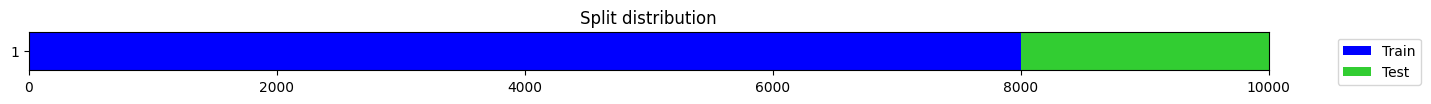

In [23]:
splits = get_splits(lX_nz, valid_size=.2 ,shuffle=False, stratify=False)

In [24]:
check_data(lX_nz, ly_nz)

X      - shape: [10000 samples x 35 features x 20 timesteps]  type: ndarray  dtype:float32  isnan: 0
y      - shape: (10000,)  type: ndarray  dtype:int8  isnan: 0


In [25]:
n_epochs = 10
bs = 256
tfms  = [None, TSClassification()]
dsets = TSDatasets(lX_nz, ly_nz, tfms=tfms, splits=splits)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs, batch_tfms=TSStandardize(by_var=True, verbose=True))

TSStandardize mean shape=torch.Size([1, 35, 1]), std shape=torch.Size([1, 35, 1]), by_sample=False, by_var=True, by_step=False



In [26]:
model = TST(dls.vars, dls.c, dls.len, dropout=.3, fc_dropout=.8)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy],  cbs=ShowGraph())


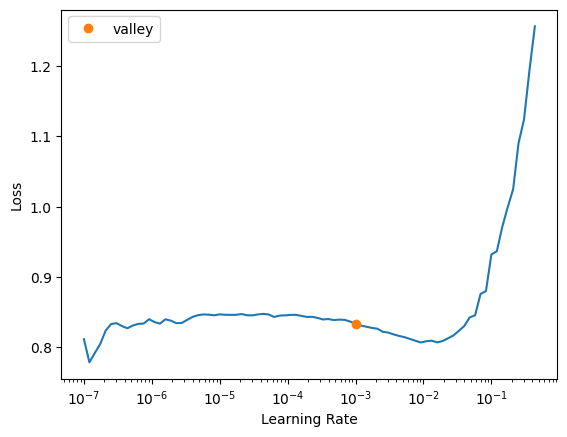

In [27]:
lrate = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.794130,0.793771,0.469000,00:00
1,0.738424,1.007390,0.462500,00:00
2,0.695081,0.996630,0.476000,00:00
3,0.656906,1.107950,0.477000,00:00
4,0.633831,1.143677,0.480000,00:00


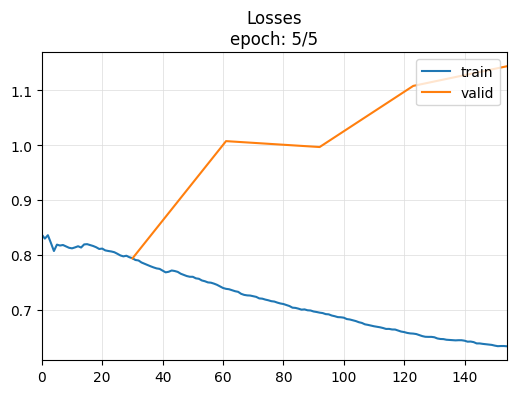

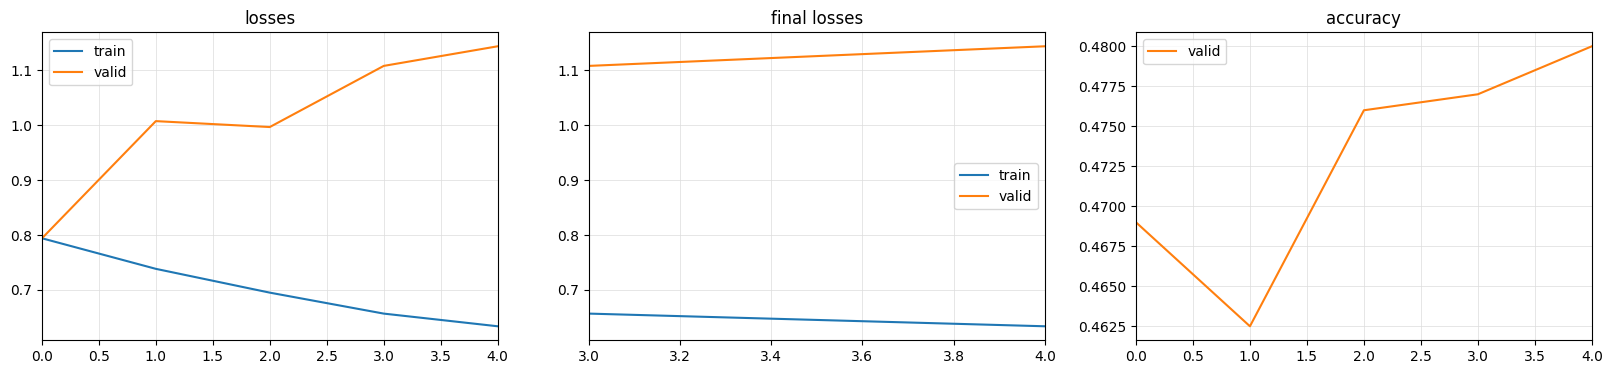


Elapsed time: 4.303927421569824


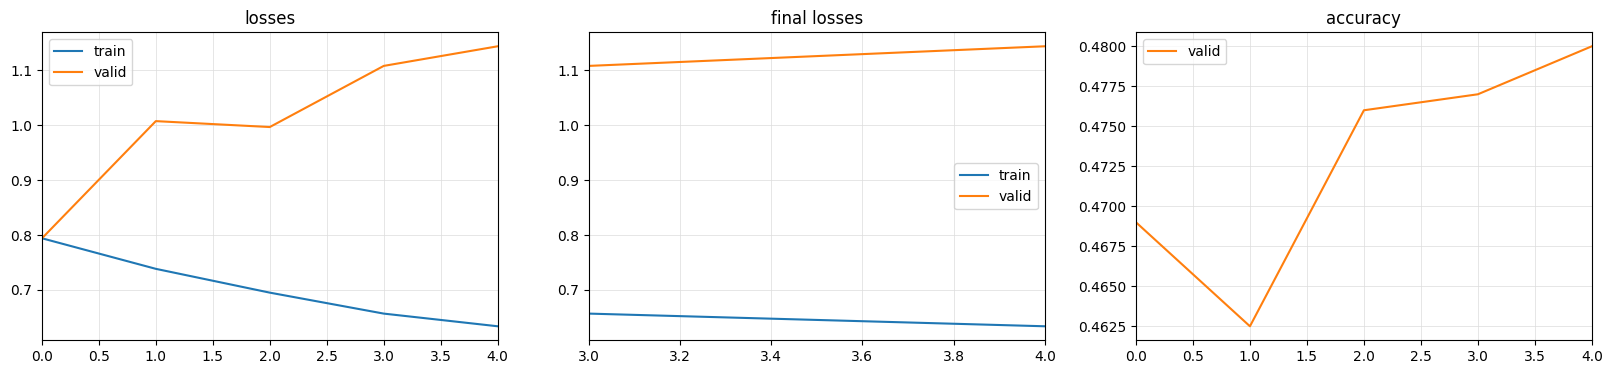

In [28]:
start = time.time()
learn.fit_one_cycle(5, lr_max=lrate.valley)
print('\nElapsed time:', time.time() - start)
learn.plot_metrics()

In [29]:
pd.Series(ly_nz).value_counts()/len(ly_nz)

,count
0,0.5298
1,0.4702


epoch,train_loss,valid_loss,accuracy,time
0,0.736219,0.752913,0.480500,00:02
1,0.736479,0.752622,0.479500,00:02
2,0.730777,0.754472,0.477500,00:03
3,0.732053,0.751871,0.474500,00:02
4,0.729915,0.749996,0.478000,00:02
5,0.723219,0.745398,0.478500,00:02
6,0.717954,0.747581,0.475500,00:03
7,0.715219,0.743100,0.466000,00:02
8,0.713864,0.741801,0.460500,00:02
9,0.710625,0.741395,0.454000,00:02


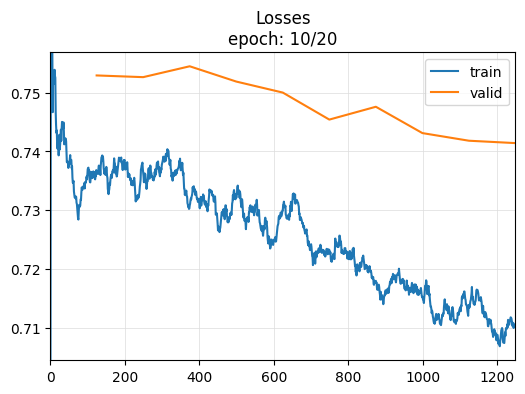

KeyboardInterrupt: 

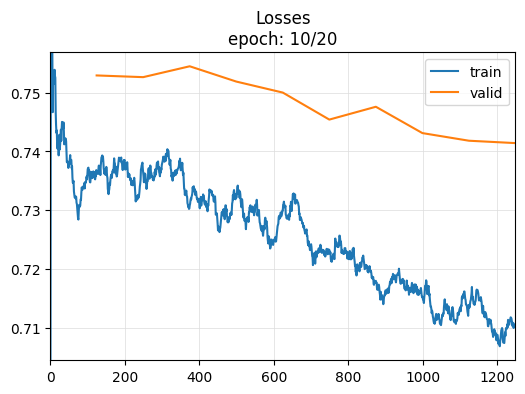

In [38]:
clf = TSClassifier(lX_nz, ly_nz, splits=splits, path='models', arch="mWDNPlus", tfms=tfms, batch_tfms=TSStandardize(by_var=True), metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 3e-7)

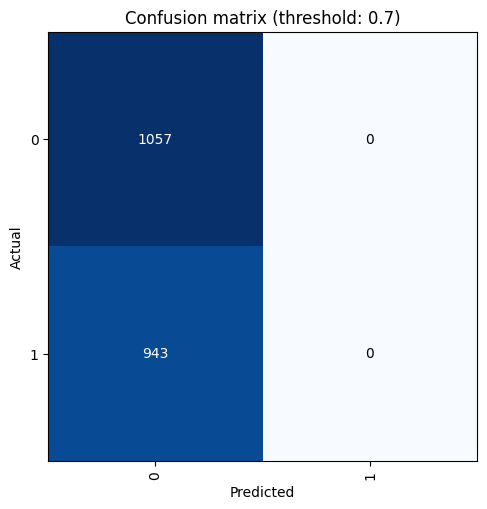

In [44]:
clf.plot_confusion_matrix(thr=.7)

epoch,train_loss,valid_loss,accuracy,time
0,0.698490,0.685908,0.476000,00:00
1,0.698113,0.686260,0.476000,00:00
2,0.696458,0.687034,0.475500,00:00
3,0.694700,0.688205,0.475500,00:00
4,0.695354,0.689487,0.476000,00:00
5,0.692018,0.690957,0.476500,00:00
6,0.688964,0.692254,0.478000,00:00
7,0.688285,0.693734,0.478000,00:01
8,0.685582,0.694933,0.479500,00:00
9,0.685291,0.696041,0.485000,00:00


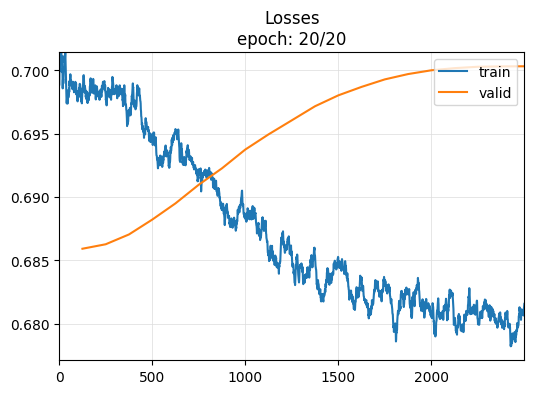

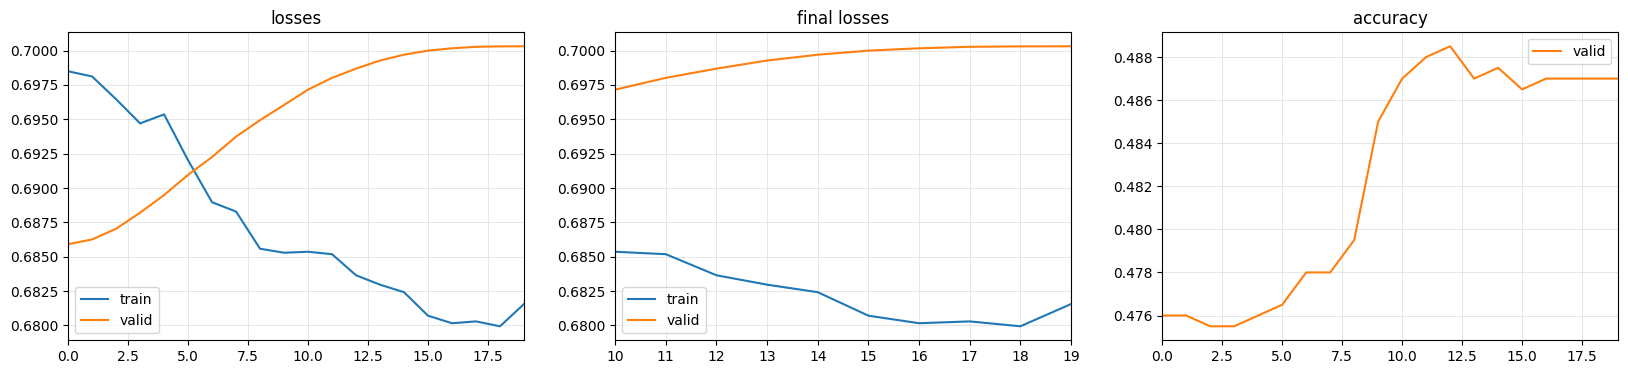

In [43]:
clf = TSClassifier(lX_nz, ly_nz, splits=splits, path='models', arch="LSTMPlus", tfms=tfms, batch_tfms=TSStandardize(by_var=True), metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 8e-6)

In [32]:
header_file_location = 'data/lastEdition/EURUSD_head.csv'
signal_file_location = 'data/lastEdition/EURUSD_signal.bin'
label_file_location = 'data/lastEdition/EURUSD_label.bin'


In [33]:
len(ly_nz)

10000

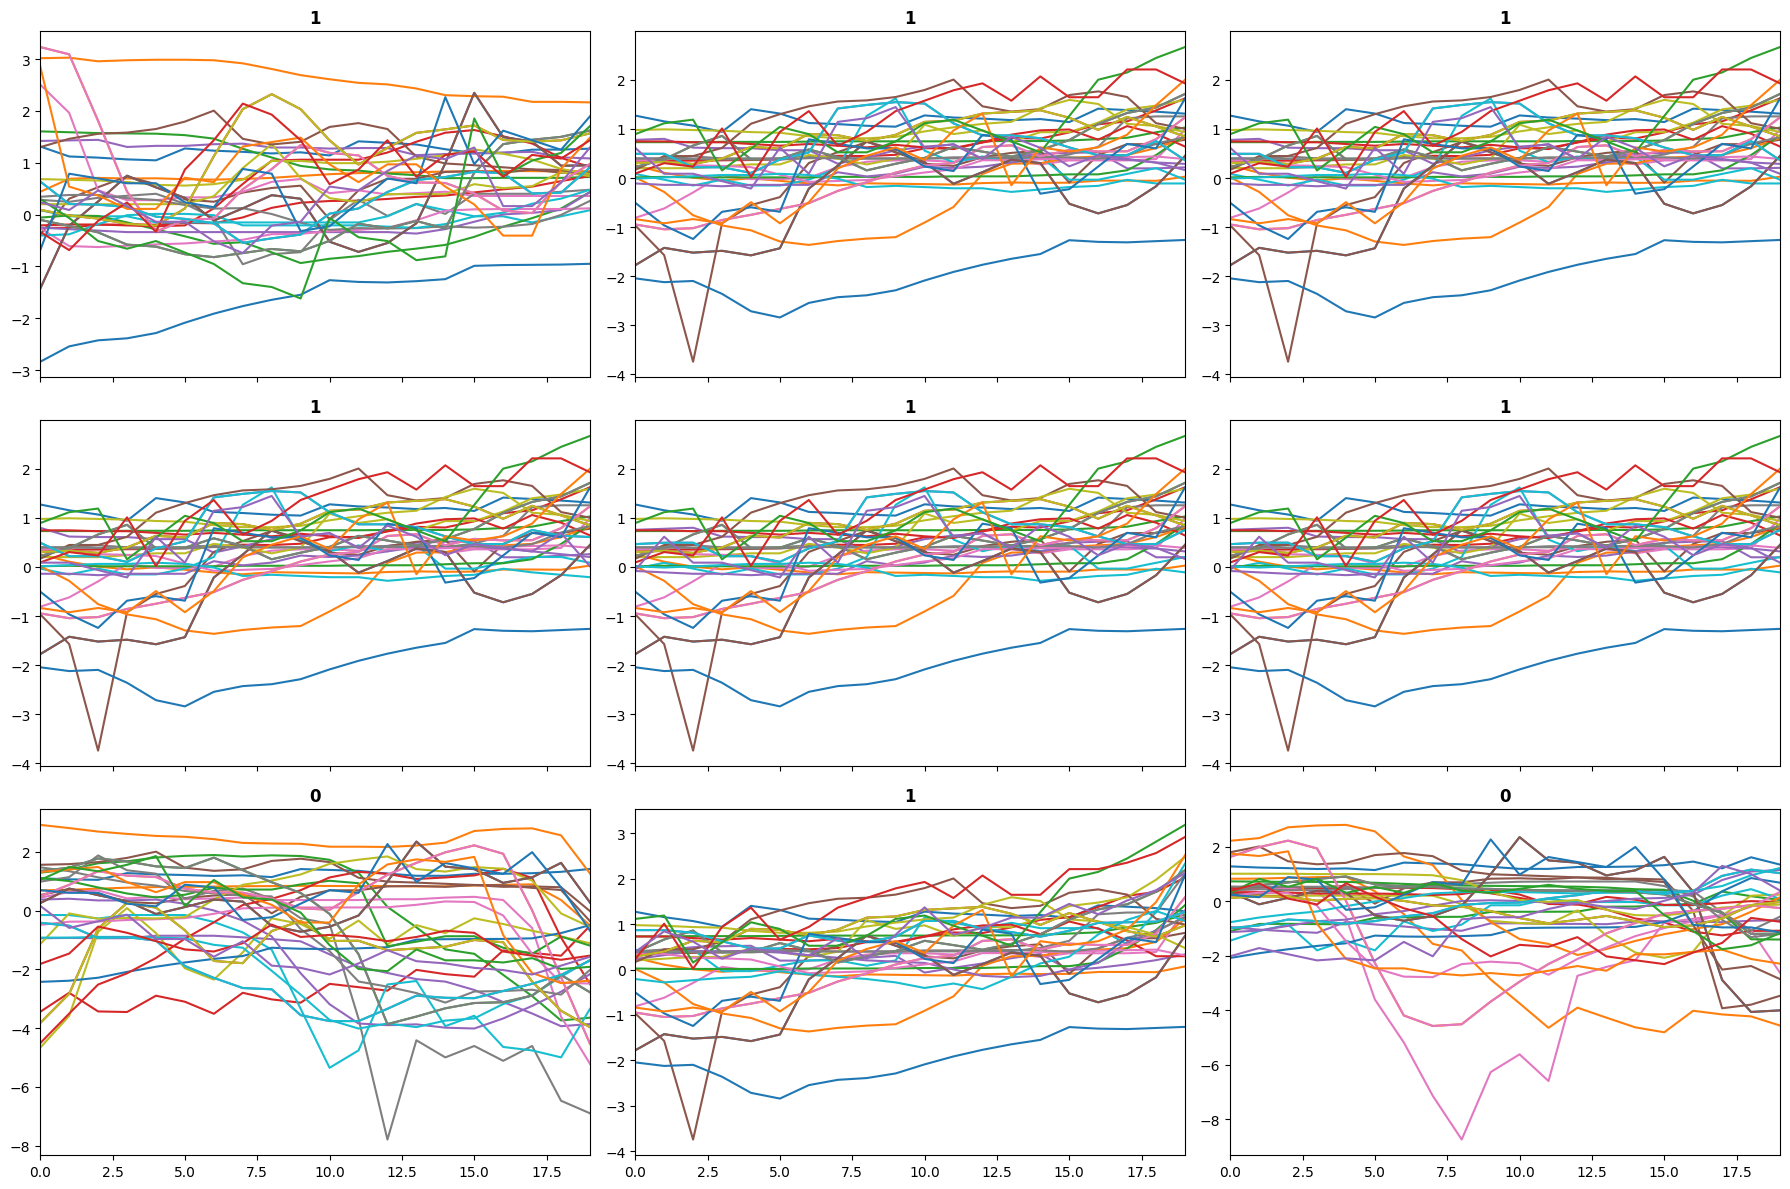

In [34]:
clf.plot_top_losses(lX_nz, ly_nz)

# **test use cython**

In [130]:
# for an example, we'll create some binary records with the following format
fmtA = '<HHi5s'  # H represents a two byte unsigned integer.
fmtB = '<HHiiii'
# See documentation for struct.pack
r1a = struct.pack(fmtA, 9, 1, 1, b'one')
r2a = struct.pack(fmtA, 9, 1, 2, b'two')
r3a = struct.pack(fmtA, 9, 1, 3, b'three')
r1b = struct.pack(fmtB, 16, 2, 1, 2, 3, 4)
r2b = struct.pack(fmtB, 16, 2, 2, 4, 6, 8)
r3b = struct.pack(fmtB, 16, 2, 3, 6, 9, 12)

# we can concatenate them all together
b = r1a + r1b + r2a + r2b + r3a + r3b

# and just write to a file ( make sure to open it in binary format!!! )
with open('Data/simple_binary_mixed.bin', 'wb') as f:
    f.write(b)

In [157]:
%%cython -cplus

import numpy as np
import pandas as pd
cimport numpy as np
from libcpp.vector cimport vector

# We need to define our SimplestBuffer class
cdef class SimplestBuffer:
    cdef vector[char] data
    def __init__(self):
        self.data = vector[char]()

    def extend(self, bytes bytes_obj):
        cdef const char* c_data = bytes_obj
        self.data.insert(self.data.end(), c_data, c_data + len(bytes_obj))

    def __len__(self):
        return self.data.size()

    def __bytes__(self):
        return bytes(self.data)

#We need to define our fan_bytes function
def fan_bytes(bytes b, sb1, sb2):
    cdef const char* c_data = b
    cdef int record_size1 = 12 #2 + 2 + 4 + 5 = 13 but we round down to 12 to make the math work
    cdef int record_size2 = 20 #2 + 2 + 4 + 4 + 4 + 4 = 20
    cdef int offset = 0
    cdef int binlen = len(b)

    #the records are in the format record_size1, record_size2, record_size1, record_size2
    while offset < binlen:
        sb1.extend(b[offset:offset + record_size1])
        offset += record_size1
        if offset < binlen:
            sb2.extend(b[offset:offset + record_size2])
            offset += record_size2
        else:
            break
with open('Data/simple_binary_mixed.bin', 'rb') as f:
    b = f.read()

sb1 = SimplestBuffer()
sb2 = SimplestBuffer()
fan_bytes(b, sb1, sb2)

dt1 = np.dtype([('body_len', '<i2'),('msg_type', '<i2'),('number', '<u4'),('name', '<s5')])

dt2 = np.dtype([('body_len', '<i2'),('msg_type', '<i2'),('a', '<i4'),('b', '<i4'),('c', '<i4'),('d', '<i4')])



# sb.extend(bin)
df1=pd.DataFrame(np.frombuffer(bytes(sb1),dt1))
df2=pd.DataFrame(np.frombuffer(bytes(sb2),dt2))
# df1.join(df2)

from IPython.display import display
display(df1)
display(df2)

Content of stderr:
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_d8d1c8ebb81362fa9c31059d7dc8b8a1ae22dbae.c:1259:
/usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/root/.cache/ipython/cython/_cython_magic_d8d1c8ebb81362fa9c31059d7dc8b8a1ae22dbae.c:1264:10: fatal error: ios: No such file or directory
 1264 | #include "ios"
      |          ^~~~~
compilation terminated.